# Scraping a table of the biggest cities in the world from a html wikipage and cleaning it

The following script will show the easy scraping of a wikipedia page in Python. <br>
The dataset that was scraped will be cleaned and visualized in the following. <br>
I wrote an article on data cleaning based on this script, you can find the article here: <br>
https://blog.finxter.com/data-cleaning-in-python/ 

In [1]:
# import necessary libraries
import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents

### Request the html wikipage and turn it into a pandas dataframe

In [2]:
# get the wikipage response as text
url="https://en.wikipedia.org/wiki/List_of_largest_cities"
response_url=requests.get(url).text

In [3]:
# parse the html/text data into a beautifulsoup object
soup = BeautifulSoup(response_url, 'html.parser')
listofcities=soup.find('table',{'class':"wikitable"})

In [ ]:
# inspect the html object
listofcities

In [4]:
# turn the html into a pandas dataframe
df=pd.read_html(str(listofcities))
cities=pd.DataFrame(df[0])
print(cities.head())

     City[a] Country UN 2018 population estimates[b]         City proper[c]  \
     City[a] Country UN 2018 population estimates[b]             Definition   
0        NaN     NaN                             NaN                    NaN   
1      Tokyo   Japan                      37468000.0  Metropolis prefecture   
2      Delhi   India                      28514000.0           Capital City   
3   Shanghai   China                      25582000.0           Municipality   
4  São Paulo  Brazil                      21650000.0           Municipality   

                                       Metropolitan area[d]            \
   Population Area(km2)  Density(/km2)           Population Area(km2)   
0         NaN       NaN            NaN                  NaN       NaN   
1  13515271.0    2191.0      6,169[13]             37274000   13452.0   
2  16753235.0    1484.0     11,289[15]             29000000    3483.0   
3  24870895.0    6341.0  3,922[17][18]                  NaN       NaN   
4  12252

## Inspect and clean the dataset

In [5]:
# Inspect the dataset
cities

City[a]        Country  \
                         City[a]        Country   
0                            NaN            NaN   
1                          Tokyo          Japan   
2                          Delhi          India   
3                       Shanghai          China   
4                      São Paulo         Brazil   
..                           ...            ...   
77  Washington metropolitan area  United States   
78                        Yangon        Myanmar   
79                    Alexandria          Egypt   
80                         Jinan          China   
81                   Guadalajara         Mexico   

   UN 2018 population estimates[b]         City proper[c]              \
   UN 2018 population estimates[b]             Definition  Population   
0                              NaN                    NaN         NaN   
1                       37468000.0  Metropolis prefecture  13515271.0   
2                       28514000.0           Capital City  16753235.0   
3                       25582000.0           Municipality  24870895.0   
4                       21650000.0           Municipality  12252023.0   
..                             ...                    ...         ...   
77                       5207000.0       Federal district    702455.0   
78                       5157000.0                   City         NaN   
79                       5086000.0      Urban governorate         NaN   
80                       5052000.0  City (sub-provincial)   8700000.0   
81                       5023000.0           Municipality   1385621.0   

                            Metropolitan area[d]                          \
   Area(km2)  Density(/km2)           Population Area(km2) Density(/km2)   
0        NaN            NaN                  NaN       NaN           NaN   
1     2191.0      6,169[13]             37274000   13452.0     2,771[14]   
2     1484.0     11,289[15]             29000000    3483.0     8,326[16]   
3     6341.0  3,922[17][18]                  NaN       NaN           NaN   
4     1521.0      8,055[19]             21734682    7947.0     2,735[20]   
..       ...            ...                  ...       ...           ...   
77     177.0      3,969[30]              6263245   17009.0       368[99]   
78       NaN            NaN                  NaN       NaN           NaN   
79       NaN            NaN                  NaN       NaN           NaN   
80   10244.0            849                  NaN       NaN           NaN   
81     151.0      9,176[21]              5286642    3560.0          1485   

   Urban area[8]                          
      Population Area(km2) Density(/km2)  
0            NaN       NaN           NaN  
1       39105000    8231.0      4,751[e]  
2       31870000    2233.0     14,272[f]  
3       22118000    4069.0      5,436[g]  
4       22495000    3237.0      6,949[h]  
..           ...       ...           ...  
77       7583000    5501.0      1,378[r]  
78       6497000     603.0         10774  
79       4857000     293.0         16577  
80       4381000     798.0          5490  
81       5437000     313.0    17,371[22]  

[82 rows x 13 columns]

In [6]:
# Drop the columns for the metropolitan area and the urban area, as I am just interested in the city sizes
# There are several cool ways to drop a column, here are two examples
#cities.drop(cities.columns[[7, 8, 9, 10, 11, 12]], axis=1, inplace=True)
# or
cities= cities.drop(cities.iloc[:,7:], axis = 1)

In [7]:
# Dropping the first index column to get rid of the double index header. This will lead to having to rename the remaining column names
cities.columns = cities.columns.droplevel(0)

In [8]:
# Renaming the columns to make it clearer
cities.columns = ['city', "country", 'UN_2018_population_estimates', "city_definition", "city_population", "city_area_km2", "city_density/km2"]

In [9]:
cities

,city,country,UN_2018_population_estimates,city_definition,city_population,city_area_km2,city_density/km2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tokyo,Japan,37468000.0,Metropolis prefecture,13515271.0,2191.0,"6,169[13]"
2,Delhi,India,28514000.0,Capital City,16753235.0,1484.0,"11,289[15]"
3,Shanghai,China,25582000.0,Municipality,24870895.0,6341.0,"3,922[17][18]"
4,São Paulo,Brazil,21650000.0,Municipality,12252023.0,1521.0,"8,055[19]"
...,...,...,...,...,...,...,...
77,Washington metropolitan area,United States,5207000.0,Federal district,702455.0,177.0,"3,969[30]"
78,Yangon,Myanmar,5157000.0,City,NaN,NaN,NaN
79,Alexandria,Egypt,5086000.0,Urban governorate,NaN,NaN,NaN
80,Jinan,China,5052000.0,City (sub-provincial),8700000.0,10244.0,849


In [10]:
# Inspect the dataset
cities.describe()

,UN_2018_population_estimates,city_population,city_area_km2
count,8.100000e+01,7.400000e+01,74.00000
mean,1.054360e+07,7.789702e+06,4935.27027
std,6.051067e+06,5.873500e+06,11766.38004
min,5.023000e+06,2.364530e+05,22.00000
25%,6.115000e+06,2.735275e+06,358.00000
50%,8.245000e+06,7.697000e+06,1307.00000
75%,1.317100e+07,1.051551e+07,3768.50000
max,3.746800e+07,3.205416e+07,82403.00000


In [11]:
# Inspect the dataset
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   city                          81 non-null     object 
 1   country                       81 non-null     object 
 2   UN_2018_population_estimates  81 non-null     float64
 3   city_definition               80 non-null     object 
 4   city_population               74 non-null     float64
 5   city_area_km2                 74 non-null     float64
 6   city_density/km2              74 non-null     object 
dtypes: float64(3), object(4)
memory usage: 4.6+ KB


In [12]:
# Inspect the variable types
cities.dtypes

city                             object
country                          object
UN_2018_population_estimates    float64
city_definition                  object
city_population                 float64
city_area_km2                   float64
city_density/km2                 object
dtype: object

### Remove unwanted characters from a variable

In [13]:
#turn the city_density into a string to use string functions on it. Partition, splitting the variable into pieces to remove unwanted characters.
cities["city_density/km2"] = cities["city_density/km2"].astype('string')
city_density_str = cities["city_density/km2"].str.partition("[")

In [14]:
#Inspect the variable to see the partition
city_density_str

,0,1,2
0,<NA>,<NA>,<NA>
1,"6,169",[,13]
2,"11,289",[,15]
3,"3,922",[,17][18]
4,"8,055",[,19]
...,...,...,...
77,"3,969",[,30]
78,<NA>,<NA>,<NA>
79,<NA>,<NA>,<NA>
80,849,,


In [15]:
# write only the first column back on the variable and remove the last two
city_density_str_col_1 = city_density_str[0]
# Remove the "," in the string so it can be converted back to a float 
city_density_str_col_1 = city_density_str_col_1.str.replace(',','')
city_density_str_col_1

0      <NA>
1      6169
2     11289
3      3922
4      8055
      ...  
77     3969
78     <NA>
79     <NA>
80      849
81     9176
Name: 0, Length: 82, dtype: string

In [16]:
# Write the variable back into the data frame as a float
cities["city_density/km2"] = city_density_str_col_1.astype('float')
cities["city_density/km2"]

0         NaN
1      6169.0
2     11289.0
3      3922.0
4      8055.0
       ...   
77     3969.0
78        NaN
79        NaN
80      849.0
81     9176.0
Name: city_density/km2, Length: 82, dtype: float64

In [17]:
cities.describe().round(1)

,UN_2018_population_estimates,city_population,city_area_km2,city_density/km2
count,81.0,74.0,74.0,74.0
mean,10543604.9,7789701.9,4935.3,7270.6
std,6051067.3,5873500.1,11766.4,7201.1
min,5023000.0,236453.0,22.0,29.0
25%,6115000.0,2735275.2,358.0,1890.0
50%,8245000.0,7697000.0,1307.0,5163.0
75%,13171000.0,10515511.8,3768.5,11156.5
max,37468000.0,32054159.0,82403.0,41399.0


### Data Cleaning

In [18]:
# Dropping duplicates is easy
cities = cities.drop_duplicates()

In [19]:
cities

,city,country,UN_2018_population_estimates,city_definition,city_population,city_area_km2,city_density/km2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tokyo,Japan,37468000.0,Metropolis prefecture,13515271.0,2191.0,6169.0
2,Delhi,India,28514000.0,Capital City,16753235.0,1484.0,11289.0
3,Shanghai,China,25582000.0,Municipality,24870895.0,6341.0,3922.0
4,São Paulo,Brazil,21650000.0,Municipality,12252023.0,1521.0,8055.0
...,...,...,...,...,...,...,...
77,Washington metropolitan area,United States,5207000.0,Federal district,702455.0,177.0,3969.0
78,Yangon,Myanmar,5157000.0,City,NaN,NaN,NaN
79,Alexandria,Egypt,5086000.0,Urban governorate,NaN,NaN,NaN
80,Jinan,China,5052000.0,City (sub-provincial),8700000.0,10244.0,849.0


#### Replace missing values

In [20]:
#Check for the missing values in each column. One row is completely empty
cities.isnull().sum()

city                            1
country                         1
UN_2018_population_estimates    1
city_definition                 2
city_population                 8
city_area_km2                   8
city_density/km2                8
dtype: int64

In [21]:
# Drop the rows that are completely empty, meaning they have missing values in all columns
cities = cities.dropna(how='all')

In [22]:
# create a copy of the dataframe to avoid SettingWithCopyWarning
cities2 = cities.copy()

In [23]:
# create the mean of the city area sizes to replace missing values
city_area_mean = cities['city_area_km2'].mean()
# Replace the missing values by the mean (has to be written onto a new variable)
cities2['city_area_km2'] = cities2['city_area_km2'].fillna(city_area_mean)

In [24]:
# Fill the missing population data with the estimation data from the UN
cities2['city_population'] = cities2['city_population'].fillna(cities2["UN_2018_population_estimates"])

In [25]:
cities2.describe().round(2)

,UN_2018_population_estimates,city_population,city_area_km2,city_density/km2
count,81.00,81.00,81.00,74.00
mean,10543604.94,7675233.84,4935.27,7270.57
std,6051067.30,5686409.35,11239.82,7201.09
min,5023000.00,236453.00,22.00,29.00
25%,6115000.00,3054300.00,426.00,1890.00
50%,8245000.00,7260000.00,1521.00,5163.00
75%,13171000.00,10154134.00,4935.27,11156.50
max,37468000.00,32054159.00,82403.00,41399.00


In [26]:
cities2['city_population'].describe().round(1)

count          81.0
mean      7675233.8
std       5686409.4
min        236453.0
25%       3054300.0
50%       7260000.0
75%      10154134.0
max      32054159.0
Name: city_population, dtype: float64

In [27]:
# create a new variable to calculate the density
city_density = cities2['city_population']/cities2['city_area_km2']
# Fill the missing values with the calculated density
cities2.loc[:,'city_density/km2'] = cities2['city_density/km2'].fillna(value=city_density)

In [28]:
# Take a look at the variable city definition
cities2['city_definition'].value_counts()

Municipality                     20
City (sub-provincial)            12
City                             12
Capital city                      4
Metropolitan municipality         3
Urban governorate                 3
Designated city                   3
Prefecture-level city             3
Federal city                      2
Metropolitan city                 2
Country                           1
City (commune)                    1
Special capital region            1
Special administrative region     1
Consolidated city-county          1
Special city                      1
Special administrative area       1
Metropolis prefecture             1
Capital District                  1
Commune                           1
Capital City                      1
City-province                     1
N/A[m]                            1
Autonomous city                   1
City-state                        1
Federal district                  1
Name: city_definition, dtype: int64

In [29]:
# Let's impute the missing value with just "City" 
# (it's generic and they're all some sort of city so it won't hurt and we don't have to drop the whole row.
cities2['city_definition'] = cities2['city_definition'].fillna("City")

In [30]:
# Great! No missing values anymore.
cities2.isnull().sum()

city                            0
country                         0
UN_2018_population_estimates    0
city_definition                 0
city_population                 0
city_area_km2                   0
city_density/km2                0
dtype: int64

## Visualization

<AxesSubplot:xlabel='city_population', ylabel='city_area_km2'>

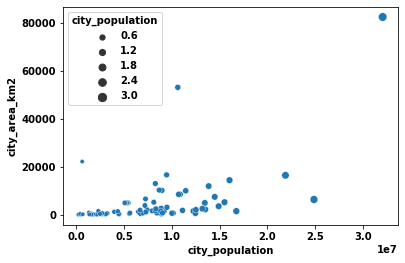

In [31]:
# Let's visualize the cities in a scatterplot and find outliers
import seaborn as sns
sns.scatterplot(data=cities2, x="city_population", y="city_area_km2", size="city_population")

In [32]:
# This one city in the top right corner is really huge. Let's find out which one it is. Chongqing, China with over 32 million inhabitants!
cities2.sort_values('city_population', ascending=False)

,city,country,UN_2018_population_estimates,city_definition,city_population,city_area_km2,city_density/km2
14,Chongqing,China,14838000.0,Municipality,32054159.0,82403.0,389.0
3,Shanghai,China,25582000.0,Municipality,24870895.0,6341.0,3922.0
8,Beijing,China,19618000.0,Municipality,21893095.0,16411.0,1334.0
2,Delhi,India,28514000.0,Capital City,16753235.0,1484.0,11289.0
40,Chengdu,China,8813000.0,City (sub-provincial),16044700.0,14378.0,1116.0
...,...,...,...,...,...,...,...
77,Washington metropolitan area,United States,5207000.0,Federal district,702455.0,177.0,3969.0
71,Khartoum,Sudan,5534000.0,City,639598.0,22142.0,29.0
65,Miami,United States,6036000.0,City,470914.0,93.0,5069.0
69,Atlanta,United States,5572000.0,City,420003.0,354.0,1186.0


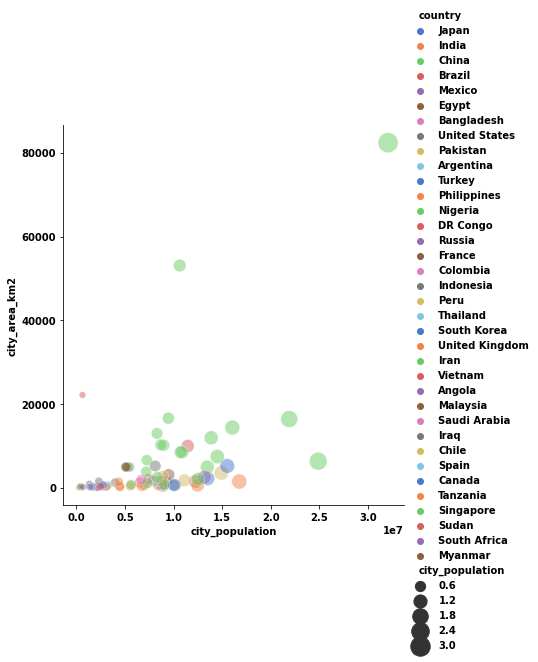

In [33]:
# Visualize the cities and their size more visually appealing in a relplot
sns.relplot(x="city_population", y="city_area_km2", hue="country", size="city_population",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=cities2)